# ***Projeto 1 - Ciência dos Dados***
###### Thiago Maitan Pegorer - 2C Engenharia

### ***Análise da inflação dos países da União Europeia***



***Pergunta a ser respondida:***
Países que estão na União Europeia tendem a possuir um maior grau democrático, maiores níveis de IDH e uma menor inflação em relação aos países europeus não pertencentes a UE e a países que atualmente posseum economias e politicas semelhantes?

***Hipótese:***
A União Europeia por ser atualmente um espelho de politicas públicas e econômicas tende a possuir um grau democrático elevado. Sendo assim, ele teria uma menor inflação e um maior IDH, ou seja, há uma relação em quanto mais democrático, melhor serão os níveis econômicos e públicos

### Introdução ###
A União Europeia é um bloco econômico que integra países do continente Europeu que possuem economia, politicas públicas e idh semelhantes. Países pertencentes a esse bloco possuem livre comércio, moeda unitária (euro), liberdade de se deslocar entre os países membros sem a necessidade de passar pelo processo de imigração, além de terem acordos e parcerias econômicas.

Assim, neste projeto iremos trabalhar em cima de alguns dos principais itens que leva a inserção de um país a esse bloco: inflação, grau de democratização, medido de -10 (pior) a 10 (melhor) e o IDH de tais países. Para isso, analisaremos tais índices na evolução do tempo.

### 1. Importando as bibliotecas e arquivos 

In [2]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/thiagopegorer/Documents/Insper/2 semestre/Ciencia dos Dados


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Leitura dos arquivos em Excel
IDH=pd.read_excel('IDH.xlsx') 
Democracia=pd.read_excel("Democracia.xlsx")
Inflacao=pd.read_excel("Inflation.xlsx")

### Criação do DataFrame

### ***IDH***

Analise do IDH

In [5]:
IDH.head()

,Paises,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
4,Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


### ***Inflação***

Análise da inflação 

In [6]:
Inflacao.head()

,Paises,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.845357,6.780488,8.405298,2.413906,13.208274,19.643462,-1.162791,3.682878,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.300196,3.383486,6.007745,3.469252,1.995241,2.024081,4.360905,2.410882,3.459343,3.000000
4,Algeria,3.47172,2.35128,0.549331,1.695183,1.501331,1.817815,1.312041,3.142056,1.921084,...,1.906329,8.323803,10.629329,16.459258,11.282812,7.331055,14.602179,-11.266611,16.245617,11.431168


### ***Democracia***

Análise do grau democrático

In [7]:

Democracia.head()

,Paises,1939,1940,1941,1942,1943,1944,1945,1946,1947,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-10.0,-10.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,-9.0,-9.0,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


***Criando a coluna de pertencimento a União Europeia***

In [8]:
europa=["Germany","Latvia","Slovenia","Greece","Austria","Italy","Belgium","Spain","Portugal","Cyprus","Bulgaria","Czech Republic","Croatia","Denmark","Slovak Republic","Slovenia","Estonia","Finland","France","Netherlands","Hungary","Ireland","Lithuania","Luxembourg","Poland","Malta","United Kingdom","Switzerland","Romania"]

In [9]:
#Democracia
demo_idx=Democracia.set_index('Paises')
demo_idx["Pertence_a_UE"]=0
demo_idx.loc[europa,'Pertence_a_UE']=1
demo_idx.loc[demo_idx.Pertence_a_UE==1].head()

,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,Pertence_a_UE
Paises,,,,,,,,,,,,,,,,,,,,,
Austria,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1
Belgium,-10.0,-10.0,-10.0,-10.0,-10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,8.0,8.0,8.0,8.0,8.0,1
Bulgaria,-10.0,-10.0,-10.0,-10.0,0.0,-2.0,-4.0,-6.0,-7.0,-7.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1
Croatia,2.0,2.0,0.0,0.0,0.0,-4.0,-7.0,-7.0,-7.0,-7.0,...,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1
Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1


In [10]:
#Inflação
inf_idx=Inflacao.set_index("Paises")
inf_idx["Pertence_a_UE"]=0
inf_idx.loc[europa,"Pertence_a_UE"]=1
inf_idx.loc[inf_idx.Pertence_a_UE==1].head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,Pertence_a_UE
Paises,,,,,,,,,,,,,,,,,,,,,
Austria,5.087154,3.340203,3.678266,3.183788,5.321415,3.122366,3.247763,2.838032,2.733573,6.326036,...,1.149610,1.683295,2.039182,1.884472,2.004815,1.763742,1.045947,1.784615,2.107097,1
Belgium,1.315469,1.667692,3.025797,4.642427,5.100713,4.086015,3.193431,2.620289,4.023826,5.192744,...,1.982859,2.141731,2.369067,2.292801,2.339240,2.157312,1.219164,1.800731,1.883163,1
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.272672,4.172762,7.385141,6.838571,9.233535,8.415658,4.333600,2.793716,4.958051,1
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.054784,3.794284,3.346413,4.014333,4.100214,6.088868,3.343513,1.016722,2.025817,1
Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.085258,3.226837,2.387610,2.979006,4.633631,5.057041,-0.311613,1.900998,1.217033,1


In [11]:
idh_idx=IDH.set_index("Paises")
idh_idx["Pertence_a_UE"]=0
idh_idx.loc[europa,"Pertence_a_UE"]=1
idh_idx.loc[idh_idx.Pertence_a_UE==1].head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011,Pertence_a_UE
Paises,,,,,,,,,,
Austria,0.740,0.790,0.839,0.860,0.866,0.870,0.876,0.879,0.885,1
Belgium,0.757,0.811,0.876,0.873,0.877,0.880,0.882,0.883,0.886,1
Bulgaria,NaN,0.698,0.715,0.749,0.753,0.758,0.765,0.766,0.771,1
Croatia,NaN,NaN,0.748,0.780,0.785,0.791,0.795,0.793,0.796,1
Cyprus,NaN,0.747,0.800,0.809,0.814,0.819,0.827,0.837,0.840,1


***Selecionando apenas os anos de 1980,2000 e 2011***

In [12]:
#Inflação
inflacao_anos = inf_idx.loc[:, ["Pertence_a_UE", "1980","2000","2011"]]
inflacao_anos = inflacao_anos.rename(columns = {"1980":"Inflação em 1980","2000":"Inflação em 2000", "2011":'Inflação em 2011'})
inflacao_anos.head()

,Pertence_a_UE,Inflação em 1980,Inflação em 2000,Inflação em 2011
Paises,,,,
Abkhazia,0,NaN,NaN,NaN
Afghanistan,0,NaN,NaN,NaN
Akrotiri and Dhekelia,0,NaN,NaN,NaN
Albania,0,NaN,4.321511,3.000000
Algeria,0,25.862039,24.598099,11.431168


In [13]:
#IDH
idh_anos = idh_idx.loc[:, ["Pertence_a_UE", 1980,2000,2011]]
idh_anos = idh_anos.rename(columns = {1980:"IDH em 1980",2000:"IDH em 2000", 2011:'IDH em 2011'})
idh_anos.head()

,Pertence_a_UE,IDH em 1980,IDH em 2000,IDH em 2011
Paises,,,,
Abkhazia,0,NaN,NaN,NaN
Afghanistan,0,0.198,0.230,0.398
Akrotiri and Dhekelia,0,NaN,NaN,NaN
Albania,0,NaN,0.691,0.739
Algeria,0,0.454,0.624,0.698


In [14]:
#Grau democrático
Dem_anos = demo_idx.loc[:, ["Pertence_a_UE", 1980,2000,2011]]
Dem_anos = Dem_anos.rename(columns = {1980:"Grau democrático em 1980",2000:"Grau democrático em 2000", 2011:'Grau democrático em 2011'})
Dem_anos.head()

,Pertence_a_UE,Grau democrático em 1980,Grau democrático em 2000,Grau democrático em 2011
Paises,,,,
Abkhazia,0,NaN,NaN,NaN
Afghanistan,0,-10.0,-7.0,NaN
Akrotiri and Dhekelia,0,NaN,NaN,NaN
Albania,0,-9.0,5.0,9.0
Algeria,0,-9.0,-3.0,2.0


***análise atráves de join***

In [15]:
#Democracia
d_join=Dem_anos.loc[Dem_anos.Pertence_a_UE==1]

#Inflacao
i_join=inflacao_anos.loc[inflacao_anos.Pertence_a_UE==1]

#IDH
idh_join=idh_anos.loc[idh_anos.Pertence_a_UE==1]

#Join
a=i_join.join(idh_join, lsuffix ="_", rsuffix="_")
b=a.join(d_join, lsuffix ="_", rsuffix="_")
join=b[["Pertence_a_UE","Inflação em 1980","Inflação em 2000","Inflação em 2011","IDH em 1980","IDH em 2000","IDH em 2011","Grau democrático em 1980","Grau democrático em 2000","Grau democrático em 2011"]]
join.head()


,Pertence_a_UE,Inflação em 1980,Inflação em 2000,Inflação em 2011,IDH em 1980,IDH em 2000,IDH em 2011,Grau democrático em 1980,Grau democrático em 2000,Grau democrático em 2011
Paises,,,,,,,,,,
Austria,1,5.522025,0.919217,2.107097,0.740,0.839,0.885,10.0,10.0,10.0
Belgium,1,4.126597,1.978546,1.883163,0.757,0.876,0.886,10.0,10.0,8.0
Bulgaria,1,NaN,6.603837,4.958051,NaN,0.715,0.771,-7.0,8.0,9.0
Croatia,1,NaN,4.604962,2.025817,NaN,0.748,0.796,-5.0,8.0,9.0
Cyprus,1,14.153347,3.819324,1.217033,NaN,0.800,0.840,10.0,10.0,10.0


### Gráficos

* Países pertencentes a União Europeia

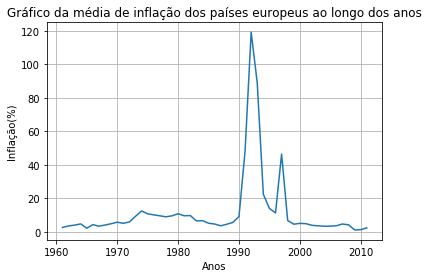

In [16]:
infla_europa=inf_idx.loc[inf_idx.Pertence_a_UE==1]
i_grafico=infla_europa.drop(["Pertence_a_UE"], axis=1)
anos=np.arange(1961,2012,1)
plt.plot(anos,i_grafico.mean())
plt.xlabel("Anos")
plt.ylabel("Inflação(%)")
plt.title("Gráfico da média de inflação dos países europeus ao longo dos anos")
plt.grid(True)
plt.show()

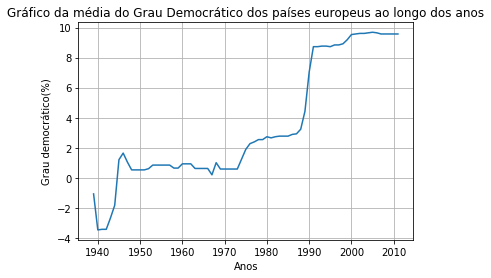

In [17]:
Dem_europa=demo_idx.loc[demo_idx.Pertence_a_UE==1]
d_grafico=Dem_europa.drop(["Pertence_a_UE"], axis=1)
anos=np.arange(1939,2012,1)
plt.plot(anos,d_grafico.mean())
plt.xlabel("Anos")
plt.ylabel("Grau democrático(%)")
plt.title("Gráfico da média do Grau Democrático dos países europeus ao longo dos anos")
plt.grid(True)
plt.show()

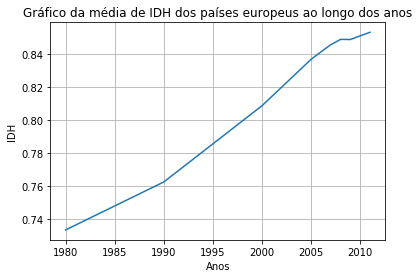

In [18]:
idh_europa=idh_idx.loc[idh_idx.Pertence_a_UE==1]
id_grafico=idh_europa.drop(["Pertence_a_UE"], axis=1)
anos=[1980,1990,2000,2005,2006,2007,2008,2009,2011]
plt.plot(anos,id_grafico.mean())
plt.xlabel("Anos")
plt.ylabel("IDH")
plt.title("Gráfico da média de IDH dos países europeus ao longo dos anos")
plt.grid(True)
plt.show()

* Países não europeus, não pertencentes a UE com politicas e economias semelhantes aos países do bloco

In [19]:
n_UE=["Brazil","Chile","Argentina","Mexico","United States","Canada","Japan","New Zealand","China","Australia"]

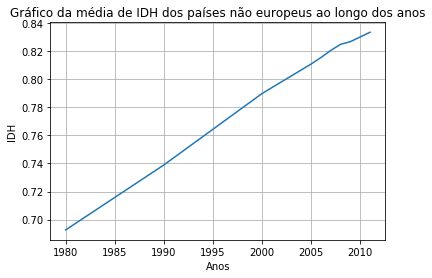

In [20]:

idh_others=idh_idx.loc[n_UE]
idh_grafico=idh_others.drop(["Pertence_a_UE"], axis=1)
anos=[1980,1990,2000,2005,2006,2007,2008,2009,2011]
plt.plot(anos,idh_grafico.mean())
plt.xlabel("Anos")
plt.ylabel("IDH")
plt.title("Gráfico da média de IDH dos países não europeus ao longo dos anos")
plt.grid(True)
plt.show()

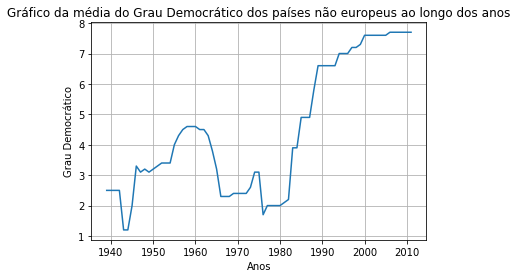

In [21]:
dem_others=demo_idx.loc[n_UE]
dem_grafico=dem_others.drop(["Pertence_a_UE"], axis=1)
anos=np.arange(1939,2012,1)
plt.plot(anos,dem_grafico.mean())
plt.xlabel("Anos")
plt.ylabel("Grau Democrático")
plt.title("Gráfico da média do Grau Democrático dos países não europeus ao longo dos anos")
plt.grid(True)
plt.show()

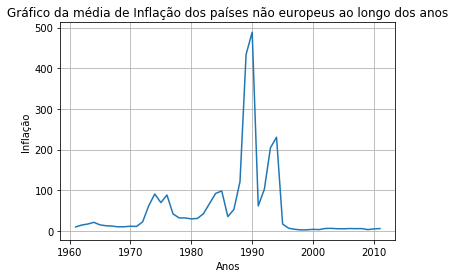

In [22]:
infla_others=inf_idx.loc[n_UE]
inf_grafico=infla_others.drop(["Pertence_a_UE"], axis=1)
anos=np.arange(1961,2012,1)
plt.plot(anos,inf_grafico.mean())
plt.xlabel("Anos")
plt.ylabel("Inflação")
plt.title("Gráfico da média de Inflação dos países não europeus ao longo dos anos")
plt.grid(True)
plt.show()

* Comparando com os países da UE:

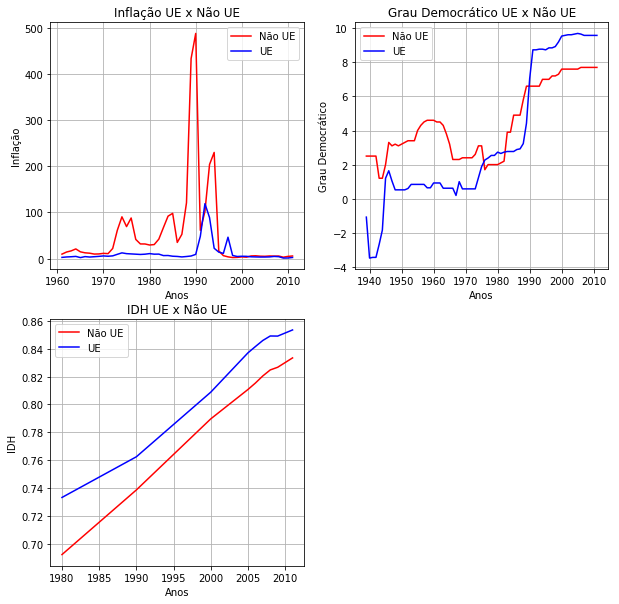

In [23]:
anos_dem=np.arange(1939,2012,1)
anos_in=np.arange(1961,2012,1)
anos_idh=[1980,1990,2000,2005,2006,2007,2008,2009,2011] 


fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(anos_in,inf_grafico.mean(), "red",label="Não UE")
plt.plot(anos_in,i_grafico.mean(), "blue",label="UE")
plt.xlabel("Anos")
plt.ylabel("Inflação")
plt.title("Inflação UE x Não UE")
plt.legend()
plt.grid(True)


plt.subplot(222)
plt.plot(anos_dem,dem_grafico.mean(), "red",label="Não UE")
plt.plot(anos_dem,d_grafico.mean(), "blue",label="UE")
plt.xlabel("Anos")
plt.ylabel("Grau Democrático")
plt.title("Grau Democrático UE x Não UE")
plt.legend()
plt.grid(True)

plt.subplot(223)
plt.plot(anos_idh,idh_grafico.mean(), "red",label="Não UE")
plt.plot(anos_idh,id_grafico.mean(), "blue",label="UE")
plt.xlabel("Anos")
plt.ylabel("IDH")
plt.title("IDH UE x Não UE")
plt.legend()
plt.grid(True)

plt.show()

***Inflação***
Analisando incialmente o gráfico da média da inflação na União Europeia, percebemos que que durante os anos de 1960 até o fim dos anos 1980, a inflação se manteve constante, tendo um pico apenas nos anos de 1970. Nos anos de 1990 ocorre um grande pico na média da inflação, devido principalmente a alguns paises, como a Croácia, Lituania e Hungria, países que havim sido recém desmembrados da antiga Iuguslávia, pertencente a URSS.

Já os países não pertencentes a UE, percebemos que ocorrem vários picos ao longo dos anos, o que siginifca que tais países passaram por grande establidade econômica, tomamos como exemplo o Brasil que enfrentou um periodo critico de sua economia até a invenção do plano real. 


***Grau Democrático***
Analsisando o gráfico de grau democrático é relevante a primeira vista que o periodo entre a Segunda Guerra Mundial e a década que se sucedeu, os países da UE foram marcados por governos totalitários, o que fica evidente pelo baixo grau de democratização. Porem, após os anos 1990, com o fim da Guerra Fria tais países elevaram tal índice e atualmente muitos possuem níveis máximos de democratização.

Os países não Europeus analisados possuem um comportamento similiar aos da UE, contudo não ocorre uma variação tão agressiva igual aos da UE. Além disso, é possível perceber que há uma democratização mais rápida porem menos acelerada em relação aos países da UE.

***IDH***
Em relação ao IDH é possível concluir que o comportamento de ambos são iguais: conforme os anos passam, o idh aumenta linearmente. Porem a UE possui uma média mais elevada ao longo de todos os anos.

* Países europeus não pertencentes a UE

In [24]:
euro_nUE=["Albania","Andorra","Armenia","Azerbaijan","Belarus","Bosnia and Herzegovina","Kazakhstan","Georgia","Iceland","Liechtenstein","Macedonia, FYR","Moldova","Monaco","Norway","Russia","Serbia","Swaziland","Turkey","Ukraine"]


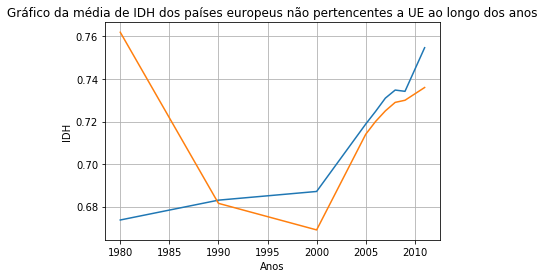

In [33]:
idh_outros=idh_idx.loc[euro_nUE]
idh_graf=idh_outros.drop(["Pertence_a_UE"], axis=1)
anos=[1980,1990,2000,2005,2006,2007,2008,2009,2011]
plt.plot(anos,idh_graf.mean())
plt.plot(anos,idh_graf.median())
plt.xlabel("Anos")
plt.ylabel("IDH")
plt.title("Gráfico da média de IDH dos países europeus não pertencentes a UE ao longo dos anos")
plt.grid(True)
plt.show()

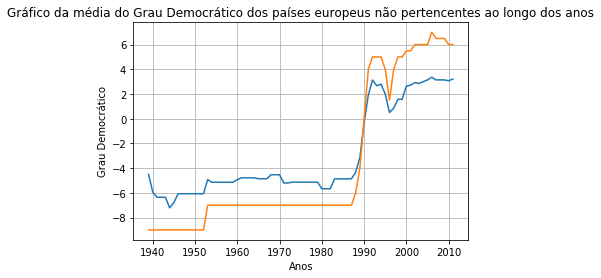

In [32]:
dem_outros=demo_idx.loc[euro_nUE]
dem_graf=dem_outros.drop(["Pertence_a_UE"], axis=1)
anos=np.arange(1939,2012,1)
plt.plot(anos,dem_graf.mean())
plt.plot(anos,dem_graf.median())
plt.xlabel("Anos")
plt.ylabel("Grau Democrático")
plt.title("Gráfico da média do Grau Democrático dos países europeus não pertencentes ao longo dos anos")
plt.grid(True)
plt.show()

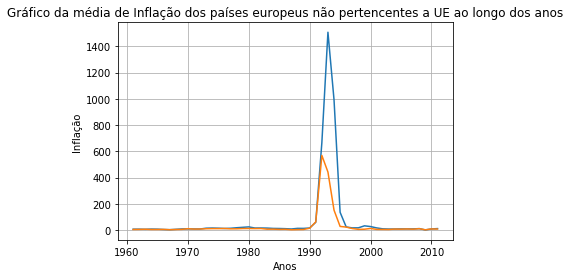

In [31]:
infla_outros=inf_idx.loc[euro_nUE]
inf_graf=infla_outros.drop(["Pertence_a_UE"], axis=1)
anos=np.arange(1961,2012,1)
plt.plot(anos,inf_graf.mean())
plt.plot(anos,inf_graf.median())
plt.xlabel("Anos")
plt.ylabel("Inflação")
plt.title("Gráfico da média de Inflação dos países europeus não pertencentes a UE ao longo dos anos")
plt.grid(True)
plt.show()

* Comparando com os países pertencentes a UE

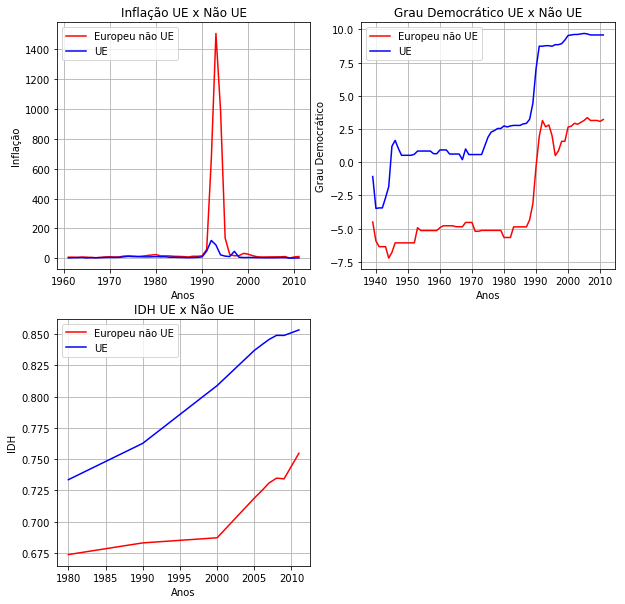

In [28]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(anos_in,inf_graf.mean(), "red",label="Europeu não UE")
plt.plot(anos_in,i_grafico.mean(), "blue",label="UE")
plt.xlabel("Anos")
plt.ylabel("Inflação")
plt.title("Inflação UE x Não UE")
plt.legend()
plt.grid(True)


plt.subplot(222)
plt.plot(anos_dem,dem_graf.mean(), "red",label="Europeu não UE")
plt.plot(anos_dem,d_grafico.mean(), "blue",label="UE")
plt.xlabel("Anos")
plt.ylabel("Grau Democrático")
plt.title("Grau Democrático UE x Não UE")
plt.legend()
plt.grid(True)

plt.subplot(223)
plt.plot(anos_idh,idh_graf.mean(), "red",label="Europeu não UE")
plt.plot(anos_idh,id_grafico.mean(), "blue",label="UE")
plt.xlabel("Anos")
plt.ylabel("IDH")
plt.title("IDH UE x Não UE")
plt.legend()
plt.grid(True)

plt.show()

***Inflação***
Analsiando os países Europeus não pertencentes a UE, percebemos que no início dos anos de 1960 e 1970 seus índice de inflação eram quase próximos a 0, porem no DataFrame muitos desses países não possuem dados, visto que alguns ainda não existiam e passaram a existir com o desmembramento da Iuguslávia e com o fim da URSS, assim focando a partir dos anos de 1990, percebemos que com suas respectivas independências seus índices inflacionários atigiram níveis elevaods, como é possível perceber ao ver que a média chega a ultrapassar a marca dos 1440% de inflação, e volta a se estabilizar no fim dos anos de 1990 e início dos 2000. Tal fator pode ser explicado com o nível de democrácia dos países, que ao mesmo tempo em que a inflação começa a descer e se estalibilizar o grau de democratização se eleva.

Já ao analisar a mediana dos países europeus não pertencentes a UE, observamos que no periodo de pico, na década de 1990, ela é menor que a média nessa mesma data, podemos concluir então que neste bloco há uma heterogenização de economias, umas como Noruega, Islândia e Monaco, no qual possuem inflações níveis UE e outros que fazem a média elevar, economias de países recem criados ou subdesenvolvidos

***Grau de Democrático***
Observando a linha da média dos países europeus não pertencentes a UE, é notável que ente as décadas de 1940 até 1990, tal índice era muito baixo, isso devido a muitos países serem comandados por ditadores, como alguns que eram pertencentes a URSS, assim possuiam péssimos índices democráticos. Porém, com o fim da URSS e com a estabilização econômica e politica desses países, o índice começou a subir. Contudo, ainda hoje, tal nível não é satisfatório, visto que a média se aproxima de 3, ou seja, há pouca democrácia nesses países ainda.

Além disso, é possível perceber que o comportamento da duas linhas se assemelham, tendem a aumentar aceleradamente a partir da decáda de 1990, o que retrata que a politíca europeia passou a ser mais democrática de forma geral

***IDH***
Comparando oa duas médias de IDH, é visível notar inicialmente que o crescimento do IDH de países da UE se da de maneira mais acelerada que os europeus não pertencentes a UE. É notório tambem, que há realmente um crescimento considerável na média a partir dos anos 2000, o que se relaciona com os fatores históricos e com as médias anteriores.

## Conclusão ##

Em vista dos gráficos e tabelas analisadas, é possível concluir que a hipótese inicial se confirma, visto que os Países Europeus por obter uma média de grau democrático maior, tambem obtiveram um maior idh e menor inflação ao longo do tempo, além de ser possível observar que há uma relação entre eles: em periodos em que havia um menor grau de democrácia, com governos mais autoritários, as taxas de inflações eram maiores, e o IDH era menor do que em épocas mais democráticas. Além disso, ao analisar os países europeus não pertencentes a União Europeia, percebemos que nos periodos de Guerra Fria e Guerra Mundial, quase não havia democrácia, isto pois a maioria dos países desse grupo pertenciam a URRS (execeções de países como Noruega, Islândia e Monaco, por exemplo), no qual havia um governo socialista autoriatário no poder, e ao se tornarem independentes e abrirem as portas para o "mundo"capitalista, suas taxas inflacionárias aumentaram muito. 

Além disso, ao analisar as medianas dos países europeus não pertencentes a UE, concluimos que há países nesse grupo que se assemelham a econômias e políticas de países membros da União Europeia. Como exemplo, temos a Noruega, uma nação não membra da UE, porém atualmente faz parte do mercado interno europeu, um dos motivos desse país já convidado a participar do bloco ter recusado foi por questões de risco a soberania e descentralização da econômia.